In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np

# Generate a dataset with 700 rows
np.random.seed(42)  # For reproducibility
data = {
    "Year": np.random.choice(range(2000, 2025), 700),
    "Quarter": np.random.choice(["Q1", "Q2", "Q3", "Q4"], 700),
    "GDP (trillions)": np.random.uniform(1, 20, 700),
    "Inflation Rate (%)": np.random.uniform(0, 10, 700),
    "Unemployment Rate (%)": np.random.uniform(2, 15, 700),
    "Exports (trillions)": np.random.uniform(0.5, 5, 700),
    "Imports (trillions)": np.random.uniform(0.5, 5, 700),
    "Government Spending (trillions)": np.random.uniform(0.5, 3, 700),
    "Investment (trillions)": np.random.uniform(0.5, 4, 700)
}

# Create a DataFrame
df = pd.DataFrame(data)

# Preview the DataFrame
print(df.head())

# To analyze it further or plot
# df.describe() or other analysis


   Year Quarter  GDP (trillions)  Inflation Rate (%)  Unemployment Rate (%)  \
0  2006      Q2        11.210516            4.858718               2.161252   
1  2019      Q1        18.477257            2.567766               8.093984   
2  2014      Q3         7.580574            2.848729               5.916448   
3  2010      Q4         7.592111            3.072900               9.778647   
4  2007      Q1        15.012524            8.030259               5.864092   

   Exports (trillions)  Imports (trillions)  Government Spending (trillions)  \
0             2.169235             1.623510                         2.524188   
1             4.558731             1.684613                         2.876332   
2             4.130121             0.502940                         0.555165   
3             4.931863             4.418011                         2.956303   
4             3.894117             4.066677                         0.715330   

   Investment (trillions)  
0               

In [3]:
# Check the first few rows of the dataset
print(df.head())

# Get summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())


   Year Quarter  GDP (trillions)  Inflation Rate (%)  Unemployment Rate (%)  \
0  2006      Q2        11.210516            4.858718               2.161252   
1  2019      Q1        18.477257            2.567766               8.093984   
2  2014      Q3         7.580574            2.848729               5.916448   
3  2010      Q4         7.592111            3.072900               9.778647   
4  2007      Q1        15.012524            8.030259               5.864092   

   Exports (trillions)  Imports (trillions)  Government Spending (trillions)  \
0             2.169235             1.623510                         2.524188   
1             4.558731             1.684613                         2.876332   
2             4.130121             0.502940                         0.555165   
3             4.931863             4.418011                         2.956303   
4             3.894117             4.066677                         0.715330   

   Investment (trillions)  
0               

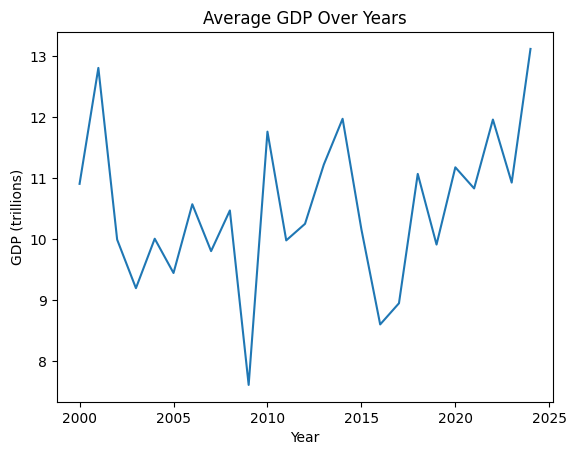

In [4]:
import matplotlib.pyplot as plt

# Plot GDP over time
df.groupby("Year")["GDP (trillions)"].mean().plot(kind="line", title="Average GDP Over Years")
plt.xlabel("Year")
plt.ylabel("GDP (trillions)")
plt.show()


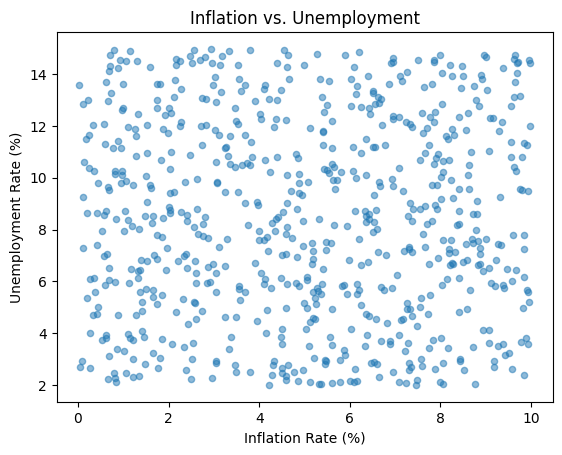

In [5]:
# Scatter plot
df.plot.scatter(x="Inflation Rate (%)", y="Unemployment Rate (%)", alpha=0.5, title="Inflation vs. Unemployment")
plt.show()


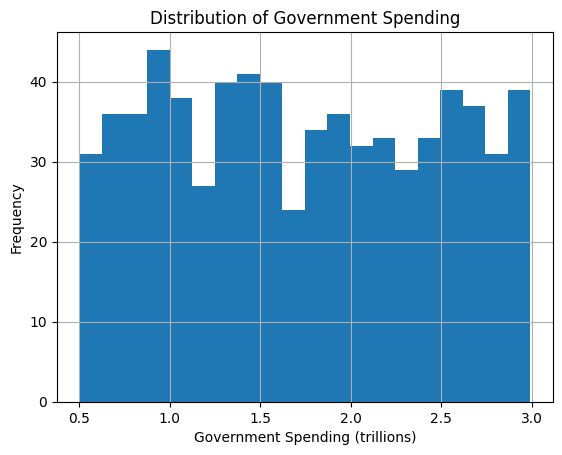

In [6]:
# Histogram
df["Government Spending (trillions)"].hist(bins=20)
plt.title("Distribution of Government Spending")
plt.xlabel("Government Spending (trillions)")
plt.ylabel("Frequency")
plt.show()


In [7]:
print(df.dtypes)


Year                                 int64
Quarter                             object
GDP (trillions)                    float64
Inflation Rate (%)                 float64
Unemployment Rate (%)              float64
Exports (trillions)                float64
Imports (trillions)                float64
Government Spending (trillions)    float64
Investment (trillions)             float64
dtype: object


In [8]:
# Map Quarter strings to numeric values
df['Quarter'] = df['Quarter'].replace({'Q1': 1, 'Q2': 2, 'Q3': 3, 'Q4': 4})


In [9]:
print(df['Quarter'].unique())
print(df.dtypes)


[2 1 3 4]
Year                                 int64
Quarter                              int64
GDP (trillions)                    float64
Inflation Rate (%)                 float64
Unemployment Rate (%)              float64
Exports (trillions)                float64
Imports (trillions)                float64
Government Spending (trillions)    float64
Investment (trillions)             float64
dtype: object


                                     Year   Quarter  GDP (trillions)  \
Year                             1.000000 -0.005248         0.054280   
Quarter                         -0.005248  1.000000         0.055593   
GDP (trillions)                  0.054280  0.055593         1.000000   
Inflation Rate (%)              -0.000631 -0.043744         0.010200   
Unemployment Rate (%)            0.053282  0.001596         0.010973   
Exports (trillions)             -0.034338 -0.014481        -0.064558   
Imports (trillions)             -0.040618 -0.020541         0.017785   
Government Spending (trillions) -0.042124  0.076076         0.047142   
Investment (trillions)          -0.014475 -0.037178        -0.015417   

                                 Inflation Rate (%)  Unemployment Rate (%)  \
Year                                      -0.000631               0.053282   
Quarter                                   -0.043744               0.001596   
GDP (trillions)                            0.

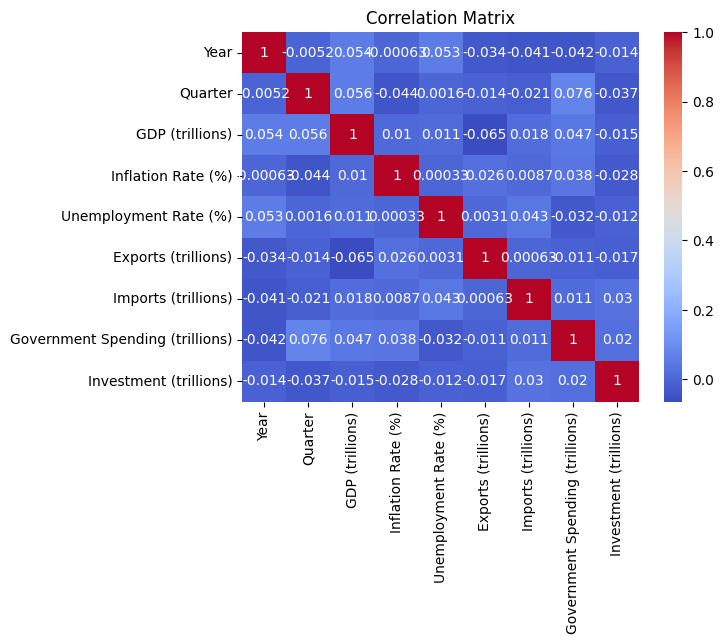

In [10]:
# Correlation matrix
print(df.corr())

# Heatmap (if seaborn is installed)
import seaborn as sns
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [11]:
# Average values by year
yearly_data = df.groupby("Year").mean()
print(yearly_data)

# Average values by quarter
quarterly_data = df.groupby("Quarter").mean()
print(quarterly_data)


       Quarter  GDP (trillions)  Inflation Rate (%)  Unemployment Rate (%)  \
Year                                                                         
2000  2.717949        10.901918            5.037215               7.981153   
2001  2.320000        12.803466            5.094407               9.102857   
2002  2.289474         9.987467            4.580626               7.820389   
2003  2.333333         9.191309            5.652511               8.122510   
2004  2.580645        10.002082            4.958324               7.513941   
2005  2.526316         9.439735            4.490071               7.906566   
2006  2.323529        10.567622            4.962429               8.893347   
2007  2.250000         9.798772            5.681206               7.604805   
2008  2.307692        10.465448            4.100780               9.880195   
2009  2.181818         7.604213            4.753634               7.362171   
2010  2.647059        11.758050            4.657188             

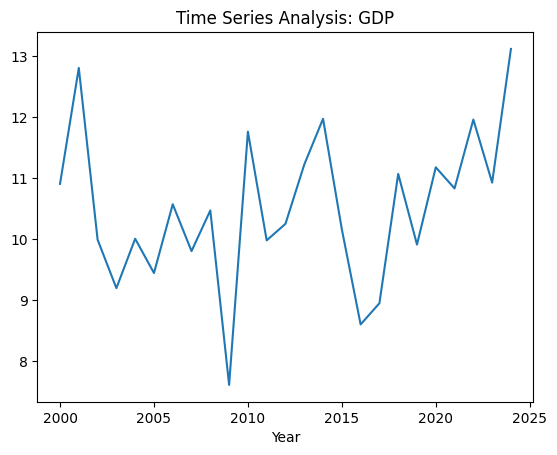

In [12]:
# Time-series data for GDP
df.sort_values("Year").groupby("Year")["GDP (trillions)"].mean().plot(kind="line", title="Time Series Analysis: GDP")
plt.show()


In [13]:
import statsmodels.api as sm

# Regression model: GDP as a function of inflation
X = df["Inflation Rate (%)"]
y = df["GDP (trillions)"]
X = sm.add_constant(X)  # Add constant term for regression
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        GDP (trillions)   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.07262
Date:                Fri, 03 Jan 2025   Prob (F-statistic):              0.788
Time:                        11:33:52   Log-Likelihood:                -2199.0
No. Observations:                 700   AIC:                             4402.
Df Residuals:                     698   BIC:                             4411.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 10.4045      0

1. Interpret the Results
R-squared and Adjusted R-squared: These indicate how well the model explains the variability in GDP. Since your R-squared is very low (close to 0), it suggests that inflation rate alone does not explain much of the variation in GDP.
P-value: The P-value for the coefficient of inflation rate (P>|t|) is not significant (greater than 0.05), meaning the inflation rate does not have a statistically significant relationship with GDP in this model.

In [14]:
X = df[["Inflation Rate (%)", "Unemployment Rate (%)", "Government Spending (trillions)"]]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        GDP (trillions)   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.5694
Date:                Fri, 03 Jan 2025   Prob (F-statistic):              0.635
Time:                        11:33:52   Log-Likelihood:                -2198.2
No. Observations:                 700   AIC:                             4404.
Df Residuals:                     696   BIC:                             4423.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)


                         variables        VIF
0                            const  14.822217
1               Inflation Rate (%)   1.001422
2            Unemployment Rate (%)   1.000996
3  Government Spending (trillions)   1.002417


3. Check for Multicollinearity
When including multiple variables, check for multicollinearity (high correlation between independent variables) using Variance Inflation Factor (VIF).

In [16]:
df["Log_GDP"] = np.log(df["GDP (trillions)"])
X = sm.add_constant(df["Inflation Rate (%)"])
model = sm.OLS(df["Log_GDP"], X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                Log_GDP   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.02743
Date:                Fri, 03 Jan 2025   Prob (F-statistic):              0.869
Time:                        11:33:53   Log-Likelihood:                -775.74
No. Observations:                 700   AIC:                             1555.
Df Residuals:                     698   BIC:                             1565.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.1335      0

4. Transform Variables if Needed
If the relationship is nonlinear, consider transforming variables (e.g., logarithmic transformation) or using polynomial regression.

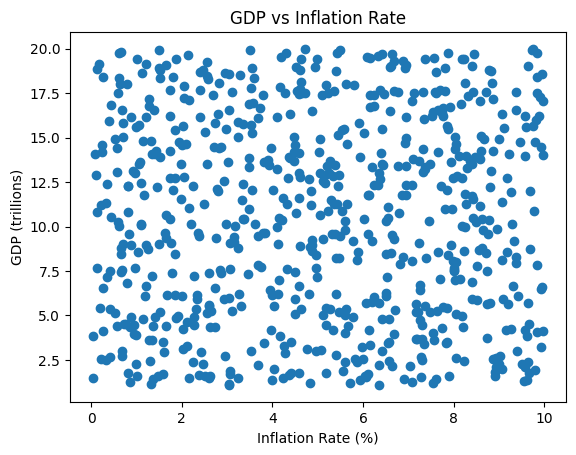

In [17]:
import matplotlib.pyplot as plt
plt.scatter(df["Inflation Rate (%)"], df["GDP (trillions)"])
plt.xlabel("Inflation Rate (%)")
plt.ylabel("GDP (trillions)")
plt.title("GDP vs Inflation Rate")
plt.show()


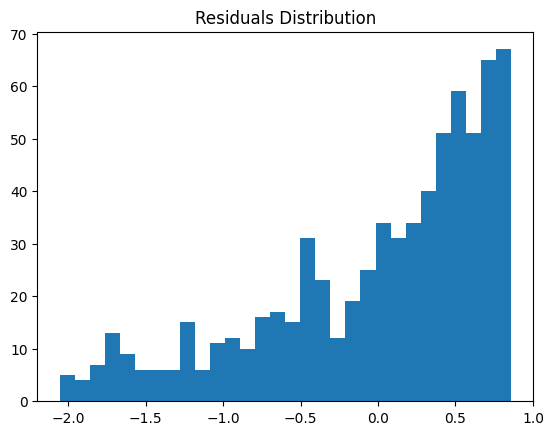

In [18]:
residuals = model.resid
plt.hist(residuals, bins=30)
plt.title("Residuals Distribution")
plt.show()


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
model = sm.OLS(y_train, X_train).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        GDP (trillions)   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.03179
Date:                Fri, 03 Jan 2025   Prob (F-statistic):              0.859
Time:                        11:33:54   Log-Likelihood:                -1757.7
No. Observations:                 560   AIC:                             3519.
Df Residuals:                     558   BIC:                             3528.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 10.6492      0

In [21]:
predictions = model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 32.271858526372995
R-squared: -0.03813178032954001


In [22]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
model = LinearRegression()
rfe = RFE(model, n_features_to_select=3)
rfe.fit(X_train, y_train)
print("Selected Features:", X_train.columns[rfe.support_])


Selected Features: Index(['const', 'Inflation Rate (%)'], dtype='object')


Not all variables might contribute significantly to the model. Use feature selection techniques to identify the most important predictors.

Techniques:
Backward Elimination Remove the least significant variable one by one based on the highest p-value (> 0.05) until all remaining variables are significant.
Forward Selection Start with no variables and add one variable at a time that improves the model the most (based on AIC, R-squared, etc.).

In [23]:
df["Interaction"] = df["Inflation Rate (%)"] * df["Government Spending (trillions)"]
X["Interaction"] = df["Interaction"]
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        GDP (trillions)   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                   0.08860
Date:                Fri, 03 Jan 2025   Prob (F-statistic):              0.915
Time:                        11:33:54   Log-Likelihood:                -2199.0
No. Observations:                 700   AIC:                             4404.
Df Residuals:                     697   BIC:                             4418.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 10.4031      0

In [24]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df["GDP (trillions)"], order=(1, 1, 1))  # Adjust p, d, q
results = model.fit()
print(results.summary())


                               SARIMAX Results                                
Dep. Variable:        GDP (trillions)   No. Observations:                  700
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2198.615
Date:                Fri, 03 Jan 2025   AIC                           4403.231
Time:                        11:33:54   BIC                           4416.880
Sample:                             0   HQIC                          4408.507
                                - 700                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0511      0.037     -1.373      0.170      -0.124       0.022
ma.L1         -0.9917      0.006   -174.322      0.000      -1.003      -0.981
sigma2        31.4015      2.689     11.676      0.0

In [25]:
import statsmodels.api as sm

X = df["Unemployment Rate (%)"]
y = df["GDP (trillions)"]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:        GDP (trillions)   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.08406
Date:                Fri, 03 Jan 2025   Prob (F-statistic):              0.772
Time:                        11:33:54   Log-Likelihood:                -2199.0
No. Observations:                 700   AIC:                             4402.
Df Residuals:                     698   BIC:                             4411.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    10.36

Hypothesis: Higher unemployment rates may lead to a decrease in GDP.
Analysis:
Use a scatter plot to visualize the relationship between Unemployment Rate and GDP.
Perform a regression analysis to see if there is a statistical correlation.

In [26]:
X = df["Government Spending (trillions)"]
y = df["GDP (trillions)"]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        GDP (trillions)   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.555
Date:                Fri, 03 Jan 2025   Prob (F-statistic):              0.213
Time:                        11:33:54   Log-Likelihood:                -2198.3
No. Observations:                 700   AIC:                             4401.
Df Residuals:                     698   BIC:                             4410.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

Hypothesis: Increased government spending might boost GDP.
Analysis:
Plot Government Spending against GDP.
Perform regression or time-series analysis.

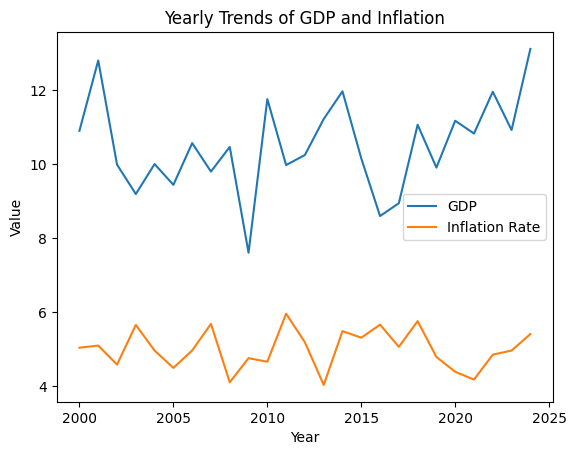

In [27]:
import matplotlib.pyplot as plt

df.groupby("Year")[["GDP (trillions)", "Inflation Rate (%)"]].mean().plot()
plt.title("Yearly Trends of GDP and Inflation")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend(["GDP", "Inflation Rate"])
plt.show()


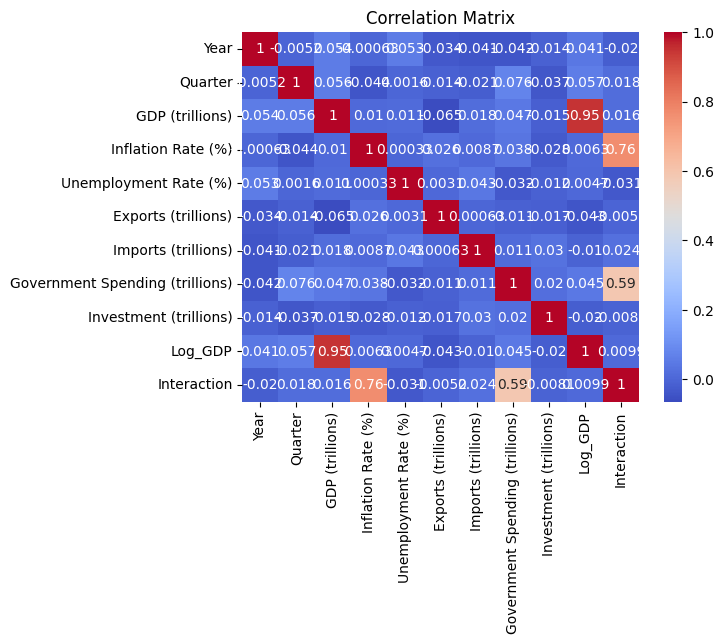

In [28]:
import seaborn as sns

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [29]:
# Exports vs. GDP
X = df["Exports (trillions)"]
y = df["GDP (trillions)"]
X = sm.add_constant(X)
model_exports = sm.OLS(y, X).fit()
print(model_exports.summary())

# Imports vs. GDP
X = df["Imports (trillions)"]
y = df["GDP (trillions)"]
X = sm.add_constant(X)
model_imports = sm.OLS(y, X).fit()
print(model_imports.summary())


                            OLS Regression Results                            
Dep. Variable:        GDP (trillions)   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.921
Date:                Fri, 03 Jan 2025   Prob (F-statistic):             0.0879
Time:                        11:33:56   Log-Likelihood:                -2197.6
No. Observations:                 700   AIC:                             4399.
Df Residuals:                     698   BIC:                             4408.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  11.2843    

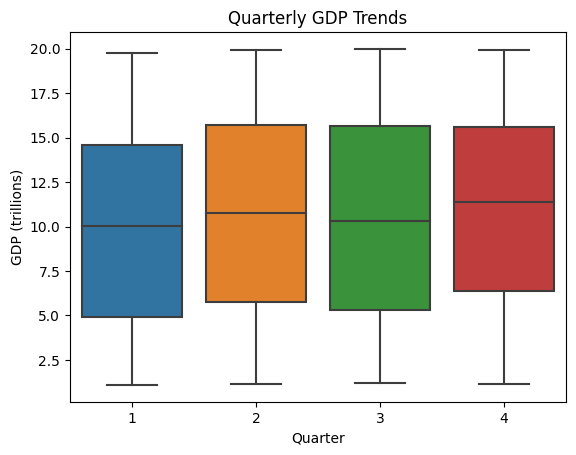

In [30]:
sns.boxplot(x="Quarter", y="GDP (trillions)", data=df)
plt.title("Quarterly GDP Trends")
plt.show()


                            OLS Regression Results                            
Dep. Variable:        GDP (trillions)   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.366
Date:                Fri, 03 Jan 2025   Prob (F-statistic):              0.124
Time:                        11:33:56   Log-Likelihood:                -2197.9
No. Observations:                 700   AIC:                             4400.
Df Residuals:                     698   BIC:                             4409.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            10.5156      0.212     49.676

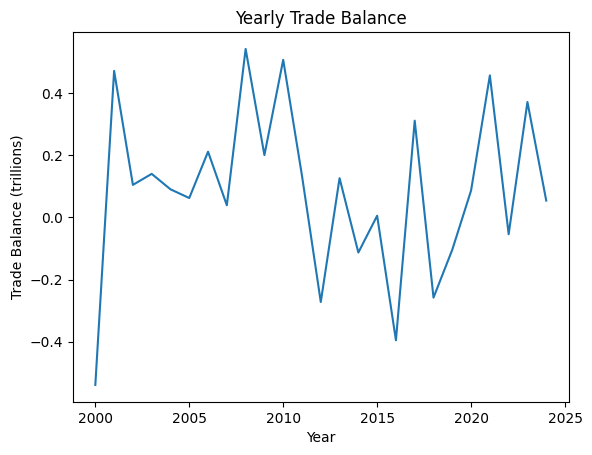

In [31]:
df["Trade Balance"] = df["Exports (trillions)"] - df["Imports (trillions)"]

# Trade Balance vs. GDP
X = df["Trade Balance"]
y = df["GDP (trillions)"]
X = sm.add_constant(X)
model_trade_balance = sm.OLS(y, X).fit()
print(model_trade_balance.summary())

# Visualize Trade Balance Trends Over Time
df.groupby("Year")["Trade Balance"].mean().plot(kind='line')
plt.title("Yearly Trade Balance")
plt.xlabel("Year")
plt.ylabel("Trade Balance (trillions)")
plt.show()


                              OLS Regression Results                             
Dep. Variable:     Unemployment Rate (%)   R-squared:                       0.000
Model:                               OLS   Adj. R-squared:                 -0.001
Method:                    Least Squares   F-statistic:                 7.777e-05
Date:                   Fri, 03 Jan 2025   Prob (F-statistic):              0.993
Time:                           11:33:56   Log-Likelihood:                -1924.1
No. Observations:                    700   AIC:                             3852.
Df Residuals:                        698   BIC:                             3861.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const 

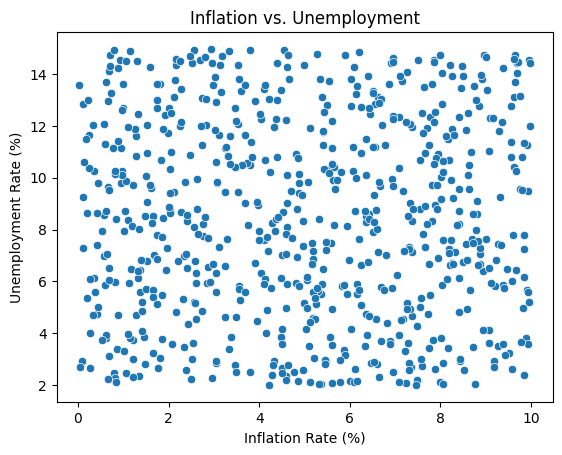

In [32]:
# Inflation vs. Unemployment
X = df["Inflation Rate (%)"]
y = df["Unemployment Rate (%)"]
X = sm.add_constant(X)
model_phillips = sm.OLS(y, X).fit()
print(model_phillips.summary())

# Visualize the relationship
sns.scatterplot(x="Inflation Rate (%)", y="Unemployment Rate (%)", data=df)
plt.title("Inflation vs. Unemployment")
plt.xlabel("Inflation Rate (%)")
plt.ylabel("Unemployment Rate (%)")
plt.show()


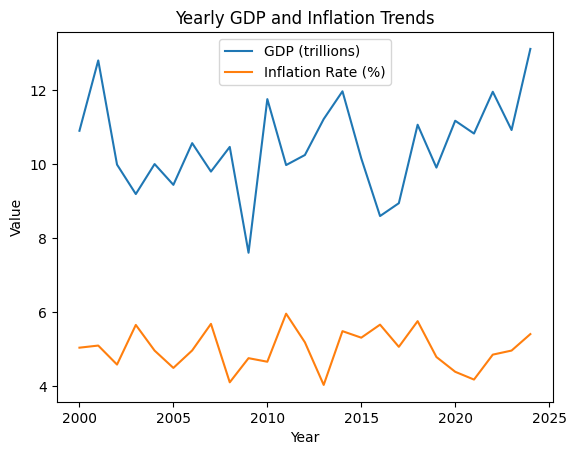

In [33]:
df.groupby("Year")[["GDP (trillions)", "Inflation Rate (%)"]].mean().plot(kind='line')
plt.title("Yearly GDP and Inflation Trends")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend(["GDP (trillions)", "Inflation Rate (%)"])
plt.show()


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare data
X = df[["Inflation Rate (%)", "Exports (trillions)", "Imports (trillions)"]]
y = df["GDP (trillions)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
predictions = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, predictions))


MSE: 31.937334767281364


In [35]:
import plotly.express as px


In [36]:
fig = px.scatter(
    df, x="Inflation Rate (%)", y="GDP (trillions)", 
    color="Quarter", size="Exports (trillions)",
    title="Inflation vs GDP with Export Sizes"
)
fig.update_layout(
    xaxis_title="Inflation Rate (%)",
    yaxis_title="GDP (trillions)"
)
fig.show()



In [37]:
import plotly.express as px

# Aggregating GDP by Year (average for all quarters)
gdp_by_year = df.groupby("Year", as_index=False)["GDP (trillions)"].mean()

# Plotting
fig = px.line(
    gdp_by_year, x="Year", y="GDP (trillions)", 
    title="GDP Over Time"
)
fig.update_layout(
    xaxis_title="Year",
    yaxis_title="GDP (trillions)",
    hovermode="x unified"
)
fig.show()



In [38]:
import plotly.express as px

# Creating a proper "Year-Quarter" column
df["Year-Quarter"] = df["Year"].astype(str) + " Q" + df["Quarter"].astype(str)

# Sort the data by "Year" and "Quarter" to ensure proper sequence
df_sorted = df.sort_values(by=["Year", "Quarter"])

# Plotting a single trend line
fig = px.line(
    df_sorted, x="Year-Quarter", y="GDP (trillions)", 
    title="Quarterly GDP Over Time"
)

# Update layout to make it more readable
fig.update_layout(
    xaxis_title="Year-Quarter",
    yaxis_title="GDP (trillions)",
    hovermode="x unified",
    xaxis=dict(tickangle=-45)  # Rotate x-axis labels for clarity
)
fig.show()



In [39]:
filtered_df = df[df['Year'] > 2015]  # Focus on years after 2015


In [40]:
import plotly.graph_objects as go

# Filter data to focus on recent years
filtered_df = df[df['Year'] >= (df['Year'].max() - 10)].copy()

# Calculate year-over-year GDP growth
filtered_df['GDP Growth'] = filtered_df['GDP (trillions)'].diff()

# Create the Waterfall chart
fig = go.Figure(go.Waterfall(
    name="GDP Growth",
    orientation="v",
    x=filtered_df['Year'].astype(str),
    y=filtered_df['GDP Growth'].fillna(0),
    text=filtered_df['GDP Growth'].round(2).astype(str),
    textposition="outside",
    connector=dict(line=dict(color="gray", dash="dot")),
    increasing=dict(marker=dict(color="green")),  # Positive growth bars
    decreasing=dict(marker=dict(color="red")),   # Negative growth bars
))

# Update layout
fig.update_layout(
    title="GDP Growth Contribution by Year",
    yaxis=dict(title="GDP Growth (trillions)", range=[-10, 10]),  # Adjust the range as necessary
    xaxis=dict(title="Year", tickangle=-45),
    showlegend=False
)

fig.show()


In [41]:
fig = px.bar(
    df,
    x='Year',
    y='GDP (trillions)',
    color='Quarter',  # Ensure Quarter column exists with values Q1, Q2, Q3, Q4
    barmode='group',
    title='Quarterly GDP Contributions Over Time',
    labels={'GDP (trillions)': 'GDP (trillions)', 'Quarter': 'Quarters'}
)
fig.show()


In [42]:
fig = px.scatter(
    df,
    x='Unemployment Rate (%)',
    y='GDP (trillions)',
    size='Government Spending (trillions)',  # Bubble size
    color='Year',  # Color by year
    title='GDP vs Unemployment Rate',
    labels={'Unemployment Rate (%)': 'Unemployment Rate (%)', 'GDP (trillions)': 'GDP (trillions)'}
)
fig.show()


In [43]:
import plotly.express as px

# Using relevant columns from your dataset
fig = px.bar(
    df,
    x='Year',
    y=['GDP (trillions)', 'Government Spending (trillions)', 'Investment (trillions)'],  # Available columns
    title='Contributions of Key Economic Indicators Over Time',
    labels={'value': 'Contribution (trillions)', 'variable': 'Indicators'},
    barmode='stack'
)
fig.show()


In [44]:
import pandas as pd

# Example data: Replace with your actual data
data = {
    "Region": ["Asia-Pacific", "Europe", "North America", "Developing Markets", "Greater China", "Overall"],
    "Inflation Rate (%)": [2.5, 1.8, 2.2, 3.1, 4.0, 2.7],
    "Unemployment Rate (%)": [5.0, 7.2, 6.1, 9.0, 3.5, 6.2],
    "GDP Growth (%)": [3.8, 2.5, 2.8, 4.2, 6.5, 3.5],
}
df = pd.DataFrame(data)


In [45]:
import plotly.express as px

fig = px.scatter(
    df,
    x="Region",
    y="Inflation Rate (%)",  # Choose any metric like GDP Growth or Unemployment Rate
    size="GDP Growth (%)",  # Size of bubbles
    color="Region",
    title="Macroeconomic Indicators by Region",
    labels={"Inflation Rate (%)": "Inflation Rate (%)", "GDP Growth (%)": "GDP Growth (%)"}
)
fig.show()


In [46]:
data = {
    "Year": [2020, 2021, 2022, 2023],
    "GDP Growth (%)": [2.5, 3.0, 3.5, 2.8],
    "Government Spending (trillions)": [15.2, 16.1, 17.0, 18.2],
}
df = pd.DataFrame(data)


In [47]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name='GDP Growth (%)', x=df['Year'], y=df['GDP Growth (%)']),
    go.Bar(name='Gov. Spending (trillions)', x=df['Year'], y=df['Government Spending (trillions)'])
])

fig.update_layout(
    barmode='group',
    title="Comparison of GDP Growth and Government Spending",
    xaxis_title="Year",
    yaxis_title="Value",
    legend_title="Indicators",
)
fig.show()


In [48]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Sample data
data = {
    "Year": [2020, 2021, 2022, 2023],
    "GDP (trillions)": [15.2, 16.1, 17.5, 18.3],
    "Inflation Rate (%)": [2.5, 3.0, 2.8, 2.7],
    "Unemployment Rate (%)": [5.5, 5.0, 4.7, 4.5],
    "Region": ["Asia-Pacific", "Europe", "North America", "Asia-Pacific"],
}
df = pd.DataFrame(data)

# KPI Cards
fig_kpi = go.Figure()

fig_kpi.add_trace(go.Indicator(
    mode="number+delta",
    value=df["GDP (trillions)"].iloc[-1],
    title={"text": "GDP (Trillions)"},
    delta={"reference": df["GDP (trillions)"].iloc[-2]},
    domain={'x': [0, 0.5], 'y': [0.5, 1]}
))

fig_kpi.add_trace(go.Indicator(
    mode="number+delta",
    value=df["Inflation Rate (%)"].iloc[-1],
    title={"text": "Inflation Rate (%)"},
    delta={"reference": df["Inflation Rate (%)"].iloc[-2]},
    domain={'x': [0.5, 1], 'y': [0.5, 1]}
))

fig_kpi.add_trace(go.Indicator(
    mode="number+delta",
    value=df["Unemployment Rate (%)"].iloc[-1],
    title={"text": "Unemployment Rate (%)"},
    delta={"reference": df["Unemployment Rate (%)"].iloc[-2]},
    domain={'x': [0.25, 0.75], 'y': [0, 0.5]}
))

fig_kpi.update_layout(title="Key Indicators")

# Line Chart for GDP Over Time
fig_gdp = px.line(df, x="Year", y="GDP (trillions)", title="GDP Over Time")

# Bar Chart for Inflation and Unemployment
fig_bar = px.bar(df, x="Year", y=["Inflation Rate (%)", "Unemployment Rate (%)"],
                 title="Inflation vs. Unemployment", barmode="group")

# Pie Chart for Regional Breakdown
fig_pie = px.pie(df, names="Region", values="GDP (trillions)", title="GDP by Region")

# Display in Kaggle
fig_kpi.show()
fig_gdp.show()
fig_bar.show()
fig_pie.show()


In [49]:
import plotly.graph_objects as go
import pandas as pd

# Example data
df = pd.DataFrame({
    'latitude': [37.7749, 34.0522, 40.7128],
    'longitude': [-122.4194, -118.2437, -74.0060],
    'value': [100, 200, 300]
})

# Create 3D scatter plot
fig = go.Figure(go.Scatter3d(
    x=df['longitude'],
    y=df['latitude'],
    z=df['value'],
    mode='markers',
    marker=dict(
        size=10,
        color=df['value'],  # Color based on value
        colorscale='Viridis',
        opacity=0.8
    )
))

fig.update_layout(
    scene=dict(
        xaxis_title='Longitude',
        yaxis_title='Latitude',
        zaxis_title='Value',
    ),
    title="3D Data Visualization"
)
fig.show()


In [50]:
import folium

# Example adapted to your GDP dataset
locations = [
    {'region': 'Region A', 'latitude': 37.7749, 'longitude': -122.4194, 'GDP Contribution': 100},
    {'region': 'Region B', 'latitude': 34.0522, 'longitude': -118.2437, 'GDP Contribution': 200},
    {'region': 'Region C', 'latitude': 40.7128, 'longitude': -74.0060, 'GDP Contribution': 300}
]

# Create a base map
map = folium.Map(location=[37.7749, -122.4194], zoom_start=4)

# Add GDP contribution markers
for loc in locations:
    folium.CircleMarker(
        location=(loc['latitude'], loc['longitude']),
        radius=loc['GDP Contribution'] / 50,  # Adjust size based on GDP Contribution
        color='blue',
        fill=True,
        fill_color='blue',
        tooltip=f"{loc['region']}<br>GDP: {loc['GDP Contribution']}"
    ).add_to(map)

map



In [51]:
import plotly.express as px

# Example GDP data for interactive plotting
df = pd.DataFrame({
    'Year': [2010, 2011, 2012, 2013],
    'Agriculture': [2.1, 2.3, 2.5, 2.7],
    'Manufacturing': [3.5, 3.8, 4.0, 4.2],
    'Services': [4.5, 4.8, 5.0, 5.2]
})

fig = px.line(
    df.melt(id_vars='Year', var_name='Sector', value_name='GDP Contribution'),
    x='Year',
    y='GDP Contribution',
    color='Sector',
    title="Interactive GDP Contribution by Sector Over Time"
)

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='GDP Contribution (Trillions)',
    hovermode='x unified'
)

fig.show()


In [52]:
import plotly.graph_objects as go

# Example adapted to your GDP dataset
# Assuming df contains 'Year', 'Sector', and 'GDP Contribution'

df = pd.DataFrame({
    'Year': [2010, 2010, 2011, 2011],
    'Sector': ['Agriculture', 'Manufacturing', 'Agriculture', 'Manufacturing'],
    'GDP Contribution': [2.1, 3.5, 2.3, 3.8]
})

# Convert 'Sector' to numeric for plotting
df['Sector Code'] = df['Sector'].astype('category').cat.codes

fig = go.Figure(data=[go.Scatter3d(
    x=df['Year'],
    y=df['Sector Code'],
    z=df['GDP Contribution'],
    mode='markers',
    marker=dict(
        size=10,
        color=df['GDP Contribution'],  # Color based on GDP Contribution
        colorscale='Viridis',
        opacity=0.8
    )
)])

# Update layout
fig.update_layout(
    scene=dict(
        xaxis_title='Year',
        yaxis=dict(
            title='Sector',
            tickvals=list(df['Sector Code'].unique()),
            ticktext=list(df['Sector'].unique())
        ),
        zaxis_title='GDP Contribution (Trillions)'
    ),
    title="3D Visualization of GDP Contributions by Sector and Year"
)

fig.show()


In [53]:
import plotly.express as px

# Example data
df = pd.DataFrame({
    'Year': [2010, 2010, 2011, 2011, 2012, 2012],
    'Sector': ['Agriculture', 'Manufacturing', 'Agriculture', 'Manufacturing', 'Agriculture', 'Manufacturing'],
    'GDP Contribution': [2.1, 3.5, 2.3, 3.8, 2.5, 4.0],
    'Region': ['Region A', 'Region B', 'Region A', 'Region B', 'Region A', 'Region B']
})

# Animated bubble chart
fig = px.scatter(
    df,
    x="Sector",
    y="GDP Contribution",
    animation_frame="Year",
    size="GDP Contribution",
    color="Region",
    hover_name="Region",
    title="Animated GDP Contribution Over Time by Sector",
    labels={"GDP Contribution": "GDP Contribution (Trillions)", "Sector": "Sectors"}
)
fig.show()


In [54]:
import plotly.express as px

# Aggregate GDP data by sector
df = pd.DataFrame({
    'Sector': ['Agriculture', 'Manufacturing', 'Services'],
    'GDP Contribution': [2.5, 4.2, 5.7]
})

# Radial bar chart
fig = px.bar_polar(
    df,
    r="GDP Contribution",
    theta="Sector",
    color="Sector",
    title="GDP Contributions by Sector",
    template="plotly_dark"
)
fig.show()


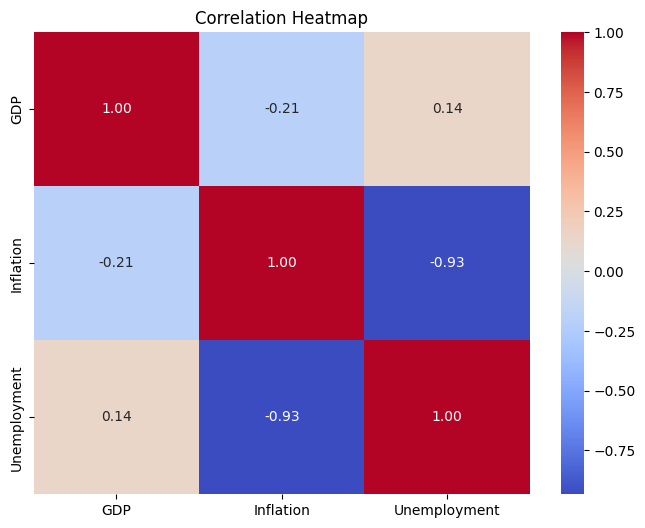

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example correlation data
df = pd.DataFrame({
    'GDP': [1, 2, 3, 4, 5],
    'Inflation': [2.1, 1.9, 2.4, 1.8, 2.0],
    'Unemployment': [5, 6, 4, 7, 5]
})

# Compute correlation
corr = df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [56]:
import plotly.express as px

# Example hierarchical data
df = pd.DataFrame({
    'Sector': ['Agriculture', 'Agriculture', 'Manufacturing', 'Manufacturing', 'Services', 'Services'],
    'Sub-Sector': ['Farming', 'Fishing', 'Electronics', 'Textiles', 'IT', 'Tourism'],
    'GDP Contribution': [1.2, 0.9, 2.5, 1.7, 3.0, 2.2]
})

fig = px.treemap(
    df,
    path=['Sector', 'Sub-Sector'],
    values='GDP Contribution',
    color='GDP Contribution',
    title="GDP Contributions by Sector and Sub-Sector",
    color_continuous_scale='Blues'
)
fig.show()


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
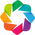

figure(id='p1011', ...)

In [57]:
import holoviews as hv
import networkx as nx
hv.extension('bokeh')

# Example data
edges = [
    ('Agriculture', 'Manufacturing', 2.5),
    ('Manufacturing', 'Services', 3.5),
    ('Services', 'Agriculture', 1.5)
]

# Create graph
G = nx.Graph()
G.add_weighted_edges_from(edges)

# Plot chord diagram with updated options
chord = hv.Chord(G).opts(
    width=1000,  # Further increase width
    height=1000,  # Further increase height
    node_size=50,  # Larger node size for better visibility
    cmap='Category20',
    edge_color='weight',
    labels='index',  # Ensure node labels are visible
    fontscale=1.5,  # Larger font size for clarity
    title="Enhanced Sector Interconnections"
)

hv.render(chord)


In [58]:
import plotly.express as px

# Example hierarchical data
df = pd.DataFrame({
    'Region': ['Region A', 'Region A', 'Region B', 'Region B'],
    'Sector': ['Agriculture', 'Manufacturing', 'Agriculture', 'Manufacturing'],
    'Sub-Sector': ['Farming', 'Electronics', 'Fishing', 'Textiles'],
    'GDP Contribution': [1.2, 2.5, 0.9, 1.7]
})

fig = px.sunburst(
    df,
    path=['Region', 'Sector', 'Sub-Sector'],
    values='GDP Contribution',
    color='GDP Contribution',
    title="GDP Breakdown by Region, Sector, and Sub-Sector",
    color_continuous_scale='RdBu'
)
fig.show()


In [59]:
import plotly.express as px

# Example geospatial data
df = pd.DataFrame({
    'Region': ['Region A', 'Region B', 'Region C'],
    'Latitude': [37.7749, 34.0522, 40.7128],
    'Longitude': [-122.4194, -118.2437, -74.0060],
    'GDP Contribution': [100, 200, 300]
})

fig = px.scatter_3d(
    df,
    x='Longitude',
    y='Latitude',
    z='GDP Contribution',
    color='GDP Contribution',
    size='GDP Contribution',
    title="Geospatial 3D GDP Contributions"
)
fig.show()
